<a href="https://colab.research.google.com/github/ProfOP/Autonomous-obstacle-avoidance-robot/blob/main/Obstacle_Avoidance_Robot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow keras opencv-python numpy matplotlib

Error: Image not found or could not be loaded. Check the file path.


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt


image = cv2.imread('/content/istockphoto-185262648-612x612.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (120, 120))
edges = cv2.Canny(image, 100, 200)
edges = edges/255.0
edges = np.expand_dims(edges, axis=-1)
edges = np.expand_dims(edges, axis=0)
plt.imshow(edges[0, :, :, 0], cmap='gray')
plt.title("Canny Edge Detection")
plt.show()

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

NameError: name 'keras' is not defined

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


image_path = "/content/Contour1.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Image not found. Check the path.")
else:
    image = cv2.resize(image, (128, 128))
    image = image / 255.0
    image = np.expand_dims(image, axis=-1)
    image = np.expand_dims(image, axis=0)


    datagen = ImageDataGenerator(rotation_range=30, width_shift_range=0.2,
                                 height_shift_range=0.2, zoom_range=0.2,
                                 horizontal_flip=True, fill_mode='nearest')

    X_data, y_data = [], []
    for i in range(100):
        aug_iter = datagen.flow(image, batch_size=1)
        aug_image = next(aug_iter)[0]
        X_data.append(aug_image)
        y_data.append(random.choice([0, 1]))

    X_data = np.array(X_data)
    y_data = np.array(y_data)


    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

    print(f"Training Set: {X_train.shape}, {y_train.shape}")
    print(f"Testing Set: {X_test.shape}, {y_test.shape}")

NameError: name 'cv2' is not defined

In [ ]:
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

NameError: name 'X_train' is not defined

In [ ]:
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Train Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

NameError: name 'model' is not defined

Archive:  /content/sample_data/archive.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/sample_data/archive.zip or
        /content/sample_data/archive.zip.zip, and cannot find /content/sample_data/archive.zip.ZIP, period.


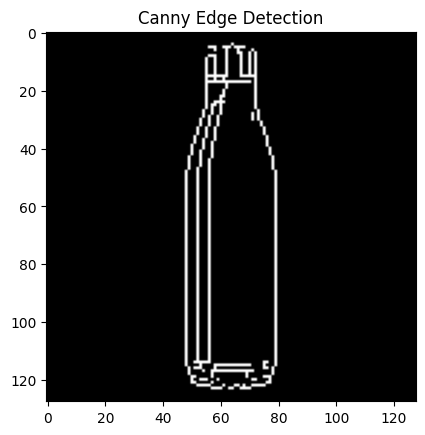

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,002 (28.20 MB)

 Trainable params: 7,392,002 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

Error: Image not found. Check the path.


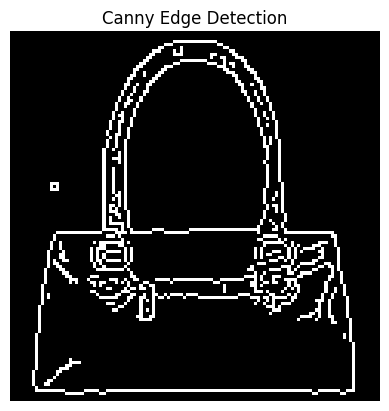

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale mode
image = cv2.imread('/content/handbags.jpg', cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded correctly
if image is None:
    raise FileNotFoundError("Image not found. Check the path.")

# Resize image
image = cv2.resize(image, (120, 120))

# Apply Canny edge detection
edges = cv2.Canny(image, 100, 200).astype(np.float32) / 255.0

# Expand dimensions to match model input (batch_size, height, width, channels)
edges = np.expand_dims(edges, axis=-1)  # Add channel dimension
edges = np.expand_dims(edges, axis=0)   # Add batch dimension

# Display the result
plt.imshow(edges[0, :, :, 0], cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')
plt.show()


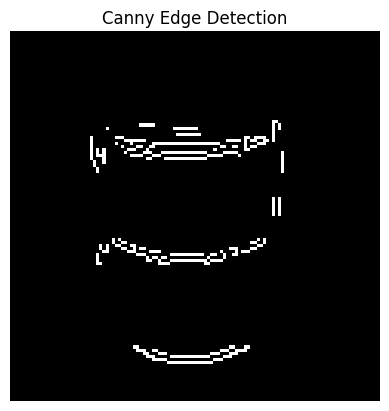

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale mode
image = cv2.imread('/content/lunch-box-1141196_640.jpg', cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded correctly
if image is None:
    raise FileNotFoundError("Image not found. Check the path: '/content/Purse.avif'")

# Resize the image to 120x120 pixels
image_resized = cv2.resize(image, (120, 120))

# Apply Canny edge detection (200, 300 are thresholds)
edges = cv2.Canny(image_resized, 200, 300)

# Normalize to [0, 1] and convert to float32
edges_normalized = edges.astype(np.float32) / 255.0

# Expand dimensions: (1, 120, 120, 1)
edges_input = np.expand_dims(edges_normalized, axis=(0, -1))

# Display the edge-detected image
plt.imshow(edges_input[0, :, :, 0], cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')
plt.show()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,002 (28.20 MB)

 Trainable params: 7,392,002 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

Training Set: (80, 128, 128, 1), (80,)
Testing Set: (20, 128, 128, 1), (20,)


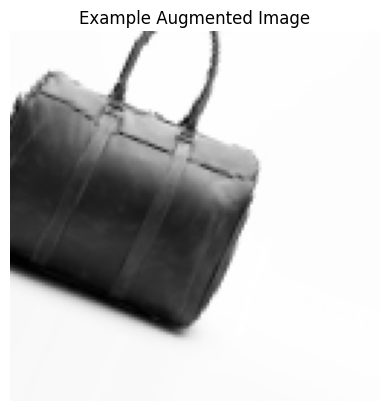

Epoch 1/22
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 706ms/step - accuracy: 0.4984 - loss: 1.6220 - val_accuracy: 0.5000 - val_loss: 1.4294
Epoch 2/22
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 572ms/step - accuracy: 0.5195 - loss: 1.2255 - val_accuracy: 0.5500 - val_loss: 0.6855
Epoch 3/22
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 575ms/step - accuracy: 0.6617 - loss: 0.6796 - val_accuracy: 0.5000 - val_loss: 0.6898
Epoch 4/22
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 586ms/step - accuracy: 0.5180 - loss: 0.6890 - val_accuracy: 0.6000 - val_loss: 0.6893
Epoch 5/22
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 785ms/step - accuracy: 0.7828 - loss: 0.6587 - val_accuracy: 0.5000 - val_loss: 0.7011
Epoch 6/22
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 573ms/step - accuracy: 0.5734 - loss: 0.6409 - val_accuracy: 0.5000 - val_loss: 0.7133
Epoch 7/22
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 565ms/step - accuracy: 0.6398 - loss: 0.6026 - val_accuracy: 0.5500 - val_loss: 0.6997
Epoch 8/22
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 567ms/step - accuracy: 0.7500 - loss: 0.6041 - val_accuracy: 0.5000 - val_loss:

In [ ]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow import keras

# --------------------------
# Part 1: Define the CNN Model
# --------------------------

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# --------------------------
# Part 2: Load and Augment the Image
# --------------------------

# Path to your image
image_path = "/content/360_F_366367203_fMyjXpGA9iTlBM2gDIJQxsJEYufeAC5f.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Image not found. Check the path.")
else:
    # Resize and normalize image
    image = cv2.resize(image, (128, 128))
    image = image / 255.0
    image = np.expand_dims(image, axis=-1)  # Shape becomes (128, 128, 1)
    image = np.expand_dims(image, axis=0)   # Shape becomes (1, 128, 128, 1)

    # Set up data augmentation
    datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Generate 100 augmented images and assign random labels (0 or 1)
    X_data, y_data = [], []
    for i in range(100):
        aug_iter = datagen.flow(image, batch_size=1)
        aug_image = next(aug_iter)[0]
        X_data.append(aug_image)
        y_data.append(random.choice([0, 1]))

    X_data = np.array(X_data)
    y_data = np.array(y_data)


    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

    print(f"Training Set: {X_train.shape}, {y_train.shape}")
    print(f"Testing Set: {X_test.shape}, {y_test.shape}")


    plt.imshow(X_train[0][:, :, 0], cmap='gray')
    plt.title("Example Augmented Image")
    plt.axis('off')
    plt.show()

    # --------------------------
    # Part 3: Train and Evaluate the Model
    # --------------------------

    # Train the model using the training data and validate on testing data
    model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

    # Evaluate the model on both training and testing sets
    train_loss, train_acc = model.evaluate(X_train, y_train)
    test_loss, test_acc = model.evaluate(X_test, y_test)

    print(f"Train Accuracy: {train_acc * 100:.2f}%")
    print(f"Test Accuracy: {test_acc * 100:.2f}%")
